In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
import time
import mlflow
import seaborn as sns
sns.set_context('paper')
from utils import download_user_order_history, locate_by_uid_pid
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
print(shap.__version__)

0.41.0


In [3]:
start_time = time.time()
data_folder = 'data'
experiment_name = 'SHAP Force Plot'

# enter example
pid = 21333
uid = 125400
run_name = 'userid: {} productid: {}'.format(uid, pid)

In [4]:
# load model
xgb = xgboost.XGBClassifier()
xgb.load_model('{}/xgb_model.json'.format(data_folder))

# load data
train_full_features = pd.read_pickle('{}/train_full_features.pickle'.format(data_folder))

In [5]:
# select instance
instance = train_full_features.loc[(train_full_features.user_id==uid)&(train_full_features['product_id']==pid)]

# download
print(instance)
# download_user_order_history(uid, pid)

# drop columns
instance = instance.drop(columns=['order_id', 'user_id', 'product_id', 'reordered'])
features = train_full_features.drop(columns=['order_id', 'user_id', 'product_id', 'reordered'])

         user_id  order_id  product_id  reordered  up_num_purchases  \
3034949   125400   2136219       21333          0                 4   

         up_cart_order_mean  up_cart_order_std  up_cart_order_sum  \
3034949                 6.0           4.242641                 24   

         up_cart_order_min  up_cart_order_max  up_cart_order_median  \
3034949                  2                 11                   5.5   

         up_reorder_times  up_first_order  up_last_order  up_mean_order_num  \
3034949                 3               1             19               10.0   

         up_std_order_num  user_max_order  up_num_purchases_within5  \
3034949          7.393691              27                       0.0   

         up_purchase_ratio_within5  up_purchase_interval_days_mean  \
3034949                        0.0                       43.666668   

         up_purchase_interval_days_median  up_purchase_interval_days_max  \
3034949                              34.0               

In [6]:
# booster = xgb.get_booster()
# model_bytearray = booster.save_raw()[4:]
# booster.save_raw = lambda : model_bytearray

In [7]:
explainer = shap.TreeExplainer(xgb, model_output='probability', data=features.sample(frac=0.05, random_state=0).values.astype(np.float64))
# shap_values = explainer.shap_values(instance)
exp = explainer.expected_value
print(exp)

0.0949343474798107


In [8]:
shap_values = explainer(instance)

In [9]:
print(instance.shape)
print(shap_values.shape)

(1, 162)
(1, 162)


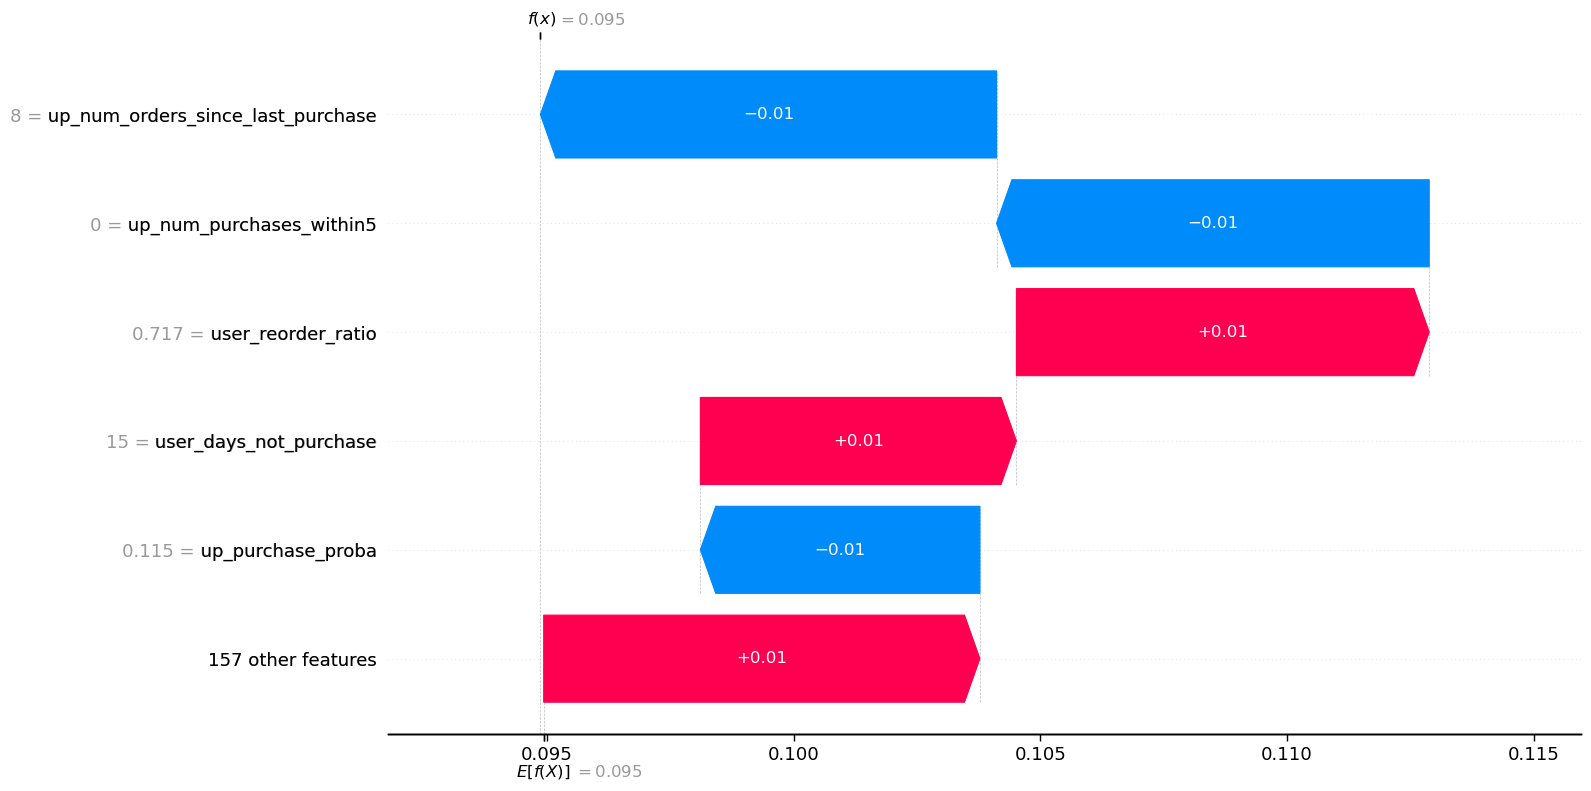

In [13]:
fig = shap.waterfall_plot(shap_values[0], show=False, max_display=6)
fig.set_size_inches(16, 8)
plt.tight_layout()
plt.savefig('data/waterfall_uid_{}_pid_{}'.format(uid, pid))
plt.show()